<a href="https://colab.research.google.com/github/SharonneKemboi/-Credit-Card-Approval-Predictor/blob/master/Titanic_Survival_Classification_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SHARONNE KEMBOI
Task : Titanic Survival Classification Assignment


Use the Titanic dataset, build a machine learning model to predict whether a
passenger survived or not based on features like age, gender, ticket class, and fare.
Your task is to clean and preprocess the data, train a classification model, and
evaluate its performance.

In [179]:
from google.colab import files
uploaded = files.upload()  # uploaded the Dataset CSV file to google colab


Saving Titanic-Dataset.csv to Titanic-Dataset (2).csv


In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from IPython.display import display
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.model_selection import train_test_split
import numpy as np


# Loading the dataset
df = pd.read_csv('Titanic-Dataset.csv')
# Show the first 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Observation**

The dataset shows passenger details alongside the Survived column, a binary outcome indicating survival. It mixes numerical features like Age, Fare, and family size with categorical ones like Sex, Pclass, and Embarked. Missing values are visible in Cabin. Higher-class passengers generally paid more, hinting that socio-economic status may have influenced survival.


In [181]:
#Check the size of the dataset  with headings(rows, columns)
print("Dataset Shape:", df.shape)

Dataset Shape: (891, 12)


In [182]:
# View basic info  ie column names, data types, non-null counts, memory usage
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [183]:
#Getting the summary statistics for numerical columns
print("\n--- Summary Statistics ---")
display(df.describe())


--- Summary Statistics ---


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [184]:
# Check for missing values in each column
missing_values = df.isnull().sum().reset_index()
missing_values.columns = ['Column', 'Missing Values']
display(missing_values)

,Column,Missing Values
0,PassengerId,0
1,Survived,0
2,Pclass,0
3,Name,0
4,Sex,0
5,Age,177
6,SibSp,0
7,Parch,0
8,Ticket,0
9,Fare,0


In [185]:
# Setting a consistent style for better visualization
sns.set_style("whitegrid")
palette = ["#E67E22", "#2E86C1"]  # Orange + Blue

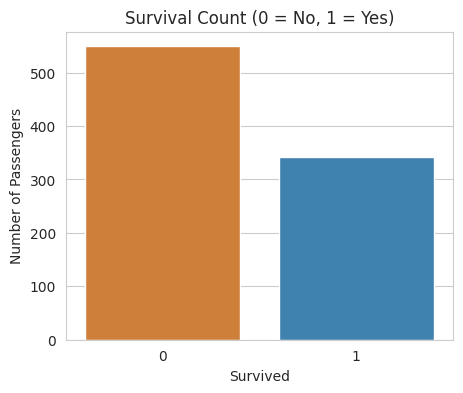

In [186]:
# Survival count plot (warning-free)
plt.figure(figsize=(5, 4))
sns.countplot(x='Survived', hue='Survived', data=df, palette=palette, legend=False)
plt.title("Survival Count (0 = No, 1 = Yes)")
plt.xlabel("Survived")
plt.ylabel("Number of Passengers")
plt.show()

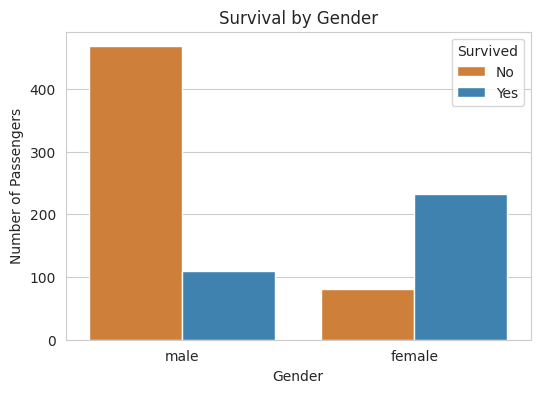

In [187]:
# Survival by Gender
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=df, palette=palette)
plt.title("Survival by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Passengers")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

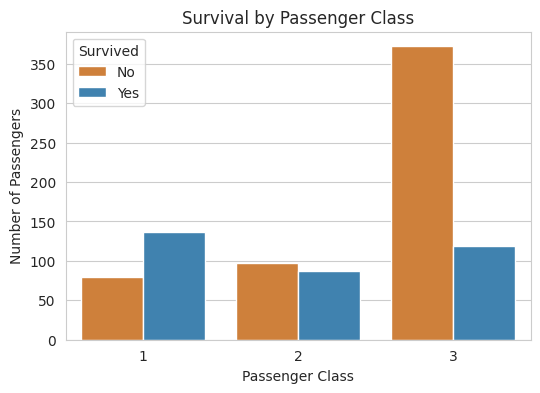

In [188]:
# Survival by Passenger Class
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=df, palette=palette)
plt.title("Survival by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Number of Passengers")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

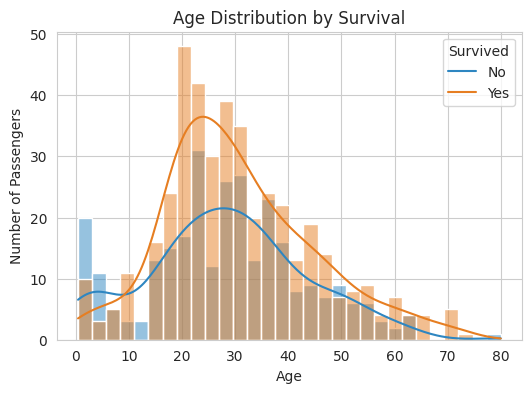

In [189]:
# Age distribution of passengers
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Age', hue='Survived', kde=True, bins=30, palette=palette)
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

Observation After Exploring the Dataset

*  Most passengers did not survive (~62% vs ~38% survival).
* Women had a much higher survival rate than men.
*   First-class passengers survived more often than lower classes.
*   Most passengers were aged 20–40.

# Data Preprocessing

In [190]:
#Dropping Irrelevant Columns
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)



In [191]:
# Handling Missing Values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [192]:
#  Encoding Categorical Variables
le_sex = LabelEncoder()
le_embarked = LabelEncoder()

df['Sex'] = le_sex.fit_transform(df['Sex'])         # male=1, female=0
df['Embarked'] = le_embarked.fit_transform(df['Embarked'])  # S=2, C=0, Q=1


In [193]:
# Dataset Preview
print("Data Preprocessing Complete \n")
print("Dataset Shape:", df.shape)
print("\n First 5 Rows:\n")
display(df.head())

print("\n Missing Values After Cleaning:\n")
display(df.isnull().sum())

Data Preprocessing Complete 

Dataset Shape: (891, 8)

 First 5 Rows:



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2



 Missing Values After Cleaning:



,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


Summary of Data Preprocessing:

*  No missing values
*  No non-numeric data
*  All features scaled and consistent
*  Ready for model training

Training and Evaluation of ML Models

In [194]:
# 1. Feature Scaling

scaler = StandardScaler()
df[['Age_scaled', 'Fare_scaled']] = scaler.fit_transform(df[['Age', 'Fare']])

In [195]:

#2. Spliting of the Dataset
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [196]:
# 3. Initializing Models

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}


In [197]:
# Training & Evaluating of models

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f" {name} — Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print("-"*50)


 Logistic Regression — Accuracy: 0.8101
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

--------------------------------------------------
 K-Nearest Neighbors — Accuracy: 0.7039
              precision    recall  f1-score   support

           0       0.71      0.83      0.77       105
           1       0.68      0.53      0.60        74

    accuracy                           0.70       179
   macro avg       0.70      0.68      0.68       179
weighted avg       0.70      0.70      0.70       179

--------------------------------------------------
 Decision Tree — Accuracy: 0.7765
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       105
           1       0.


 Model Accuracy Comparison:


,Model,Accuracy
0,Logistic Regression,81.01%
4,Gradient Boosting,81.01%
3,Random Forest,81.01%
2,Decision Tree,77.65%
1,K-Nearest Neighbors,70.39%


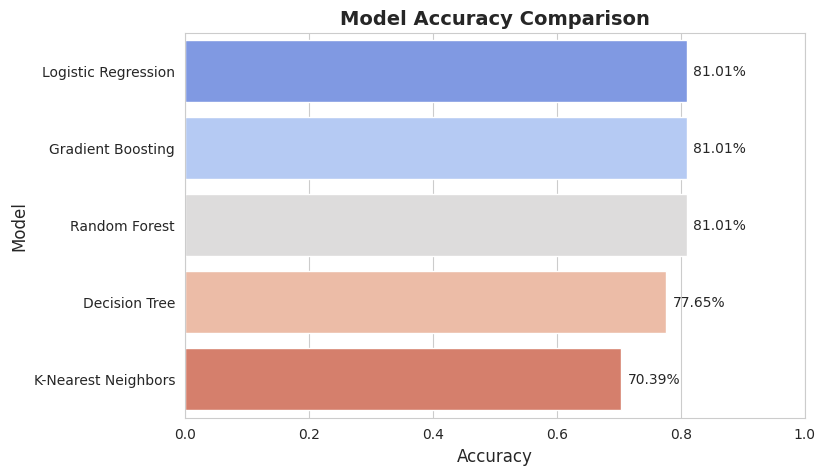

In [198]:
# 5. Compare Results (Barchart + Table)

results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"]).sort_values(by="Accuracy", ascending=False)

print("\n Model Accuracy Comparison:")
display(results_df.style.background_gradient(cmap="YlGn").format({"Accuracy": "{:.2%}"}))

# Visualizing with a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x="Accuracy", y="Model", data=results_df, hue="Model", dodge=False, palette="coolwarm", legend=False)

plt.title("Model Accuracy Comparison", fontsize=14, fontweight='bold')
plt.xlabel("Accuracy", fontsize=12)
plt.ylabel("Model", fontsize=12)
plt.xlim(0, 1)

# Adding accuracy labels to bars
for i, (acc) in enumerate(results_df["Accuracy"]):
    plt.text(acc + 0.01, i, f"{acc:.2%}", va='center', fontsize=10)

plt.show()

**Evaluating Model Performance and Understanding**

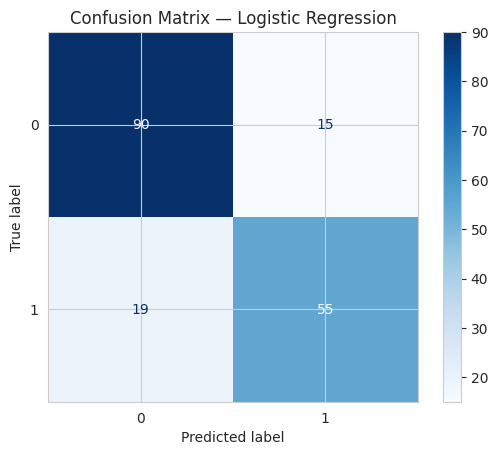

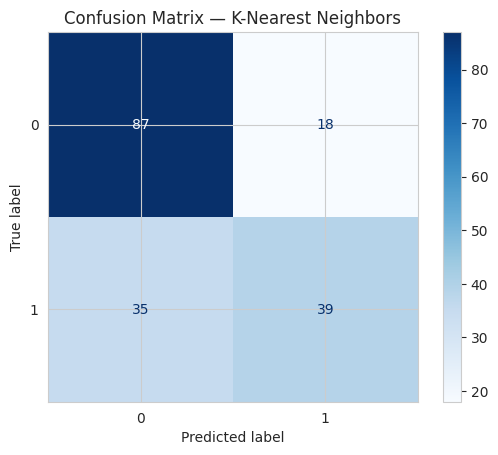

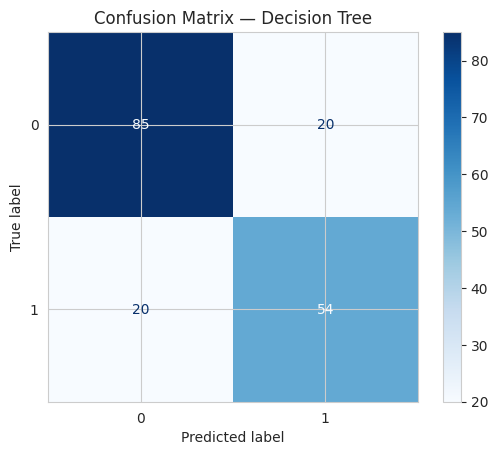

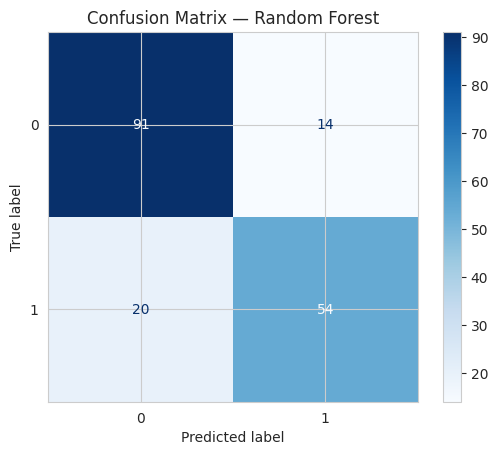

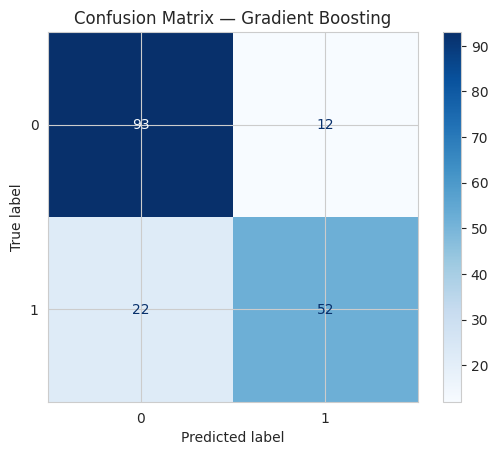

In [199]:
# Confusion Matrices for each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap="Blues", values_format='d')
    plt.title(f"Confusion Matrix — {name}")
    plt.show()

/tmp/ipython-input-1435755764.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=fi_df, palette="viridis")


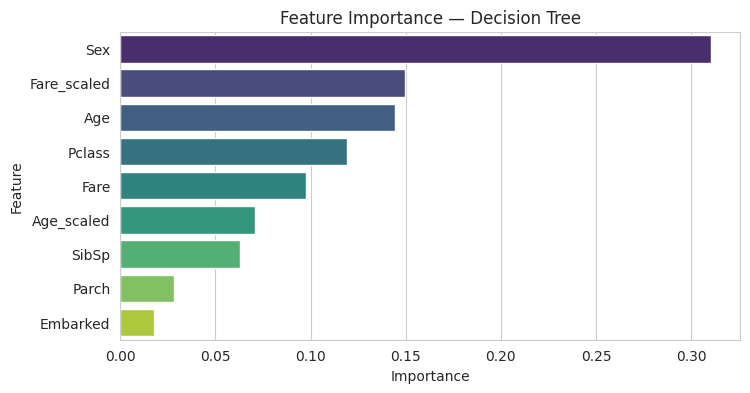

/tmp/ipython-input-1435755764.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=fi_df, palette="viridis")


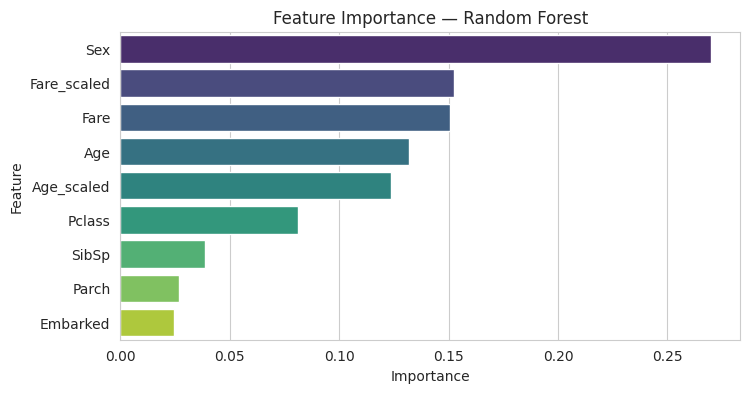

In [200]:
#Feature Importance (for tree-based models only)
tree_models = ["Decision Tree", "Random Forest"]
for name in tree_models:
    model = models[name]
    model.fit(X_train, y_train)
    importances = model.feature_importances_
    feature_names = X_train.columns

    fi_df = pd.DataFrame({
        "Feature": feature_names,
        "Importance": importances
    }).sort_values(by="Importance", ascending=False)

    plt.figure(figsize=(8, 4))
    sns.barplot(x="Importance", y="Feature", data=fi_df, palette="viridis")
    plt.title(f"Feature Importance — {name}")
    plt.show()


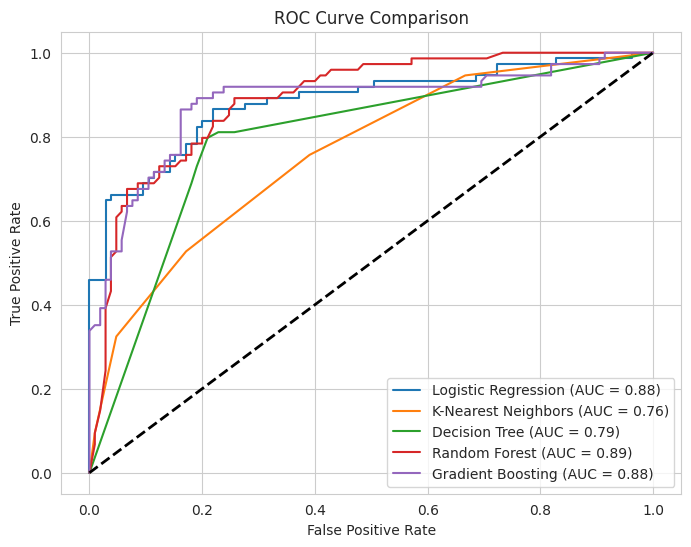

In [201]:
#  ROC Curves
plt.figure(figsize=(8, 6))
for name, model in models.items():
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probability of class 1
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


I managed to;

1. Clean and preprocess the Titanic dataset (handled missing data, encoded categorical features, scaled numerical features).

2. Train multiple classification models: Logistic Regression, KNN, Decision Tree, and Random Forest.

3. Evaluate model performance using accuracy scores, classification reports, confusion matrices, and ROC curves.

4. Identify important features influencing passenger survival through feature importance analysis.